## Video game sales Analysis

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [3]:
#EDA and data preprocessing
df = pd.read_csv("vgsales.csv")
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


### Dimensionality reduction

In [11]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold



# Missing Value Ratio
missing_ratio = df.isnull().sum() / len(df)
threshold_missing = 0.3
columns_to_drop_missing = missing_ratio[missing_ratio > threshold_missing].index
df_cleaned_missing = df.drop(columns=columns_to_drop_missing)


print("Columns after Missing Value Ratio:")
print(df_cleaned_missing.columns)



Columns after Missing Value Ratio:
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [14]:
from sklearn.feature_selection import VarianceThreshold

# Selecting numerical features for analysis
numerical_features = df_cleaned_missing.select_dtypes(include=['float64', 'int64']).columns

# Applying Low Variance Filter
selector_variance = VarianceThreshold(threshold=0.1)
data_variance_transformed = selector_variance.fit_transform(df_cleaned_missing[numerical_features])

# Create a new DataFrame with only the selected columns
df_cleaned_variance = df_cleaned_missing[numerical_features].copy()
df_cleaned_variance = df_cleaned_variance.iloc[:, selector_variance.get_support()]

print("\nColumns after Low Variance Filter:")
print(df_cleaned_variance.columns)



Columns after Low Variance Filter:
Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'Global_Sales'], dtype='object')


In [15]:
# High Correlation Filter
correlation_matrix = df_cleaned_variance.corr()

# Find columns with high correlation
high_correlation_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # You can adjust the correlation threshold as needed
            colname = correlation_matrix.columns[i]
            high_correlation_cols.add(colname)

# Drop columns with high correlation
df_cleaned_correlation = df_cleaned_variance.drop(columns=high_correlation_cols)

print("\nColumns after High Correlation Filter:")
print(df_cleaned_correlation.columns)



Columns after High Correlation Filter:
Index(['Year_of_Release', 'NA_Sales'], dtype='object')


### Dataset info and pre processing

In [16]:
print(df.shape)
print(df.size)


(16719, 16)
267504


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [18]:
df.isna().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [19]:
(df.isna().sum() * 100) / df.shape[0]

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

In [20]:
df['Developer'] = df['Developer'].astype('category')
df['Developer'] = df['Developer'].cat.add_categories(['Unknown'])
df['Rating'] = df['Rating'].astype('category')
df['Rating'] = df['Rating'].cat.add_categories(['Unknown'])

numerical_cols = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


# Fill missing categorical values with "Unknown"
categorical_cols = ['Developer', 'Rating']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Print the updated df with imputed values
df.head()

C:\Users\vedant\AppData\Local\Temp\ipykernel_24904\424698584.py:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,21.0,NaN,24.0,Unknown,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,21.0,NaN,24.0,Unknown,Unknown


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             16717 non-null  object  
 1   Platform         16719 non-null  object  
 2   Year_of_Release  16450 non-null  float64 
 3   Genre            16717 non-null  object  
 4   Publisher        16665 non-null  object  
 5   NA_Sales         16719 non-null  float64 
 6   EU_Sales         16719 non-null  float64 
 7   JP_Sales         16719 non-null  float64 
 8   Other_Sales      16719 non-null  float64 
 9   Global_Sales     16719 non-null  float64 
 10  Critic_Score     16719 non-null  float64 
 11  Critic_Count     16719 non-null  float64 
 12  User_Score       10015 non-null  object  
 13  User_Count       16719 non-null  float64 
 14  Developer        16719 non-null  category
 15  Rating           16719 non-null  category
dtypes: category(2), float64(9), object(5)
me

In [22]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,70.010886,23.609068,86.752856
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,9.776336,13.509406,384.376835
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,71.000000,21.000000,24.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,71.000000,21.000000,24.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [23]:
df.describe(include=['object'])

,Name,Platform,Genre,Publisher,User_Score
count,16717,16719,16717,16665,10015
unique,11562,31,12,581,96
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd
freq,12,2161,3370,1356,2425


### Exploratory Data Analysis (EDA) and Visualization

C:\Users\vedant\AppData\Local\Temp\ipykernel_24948\1092484111.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


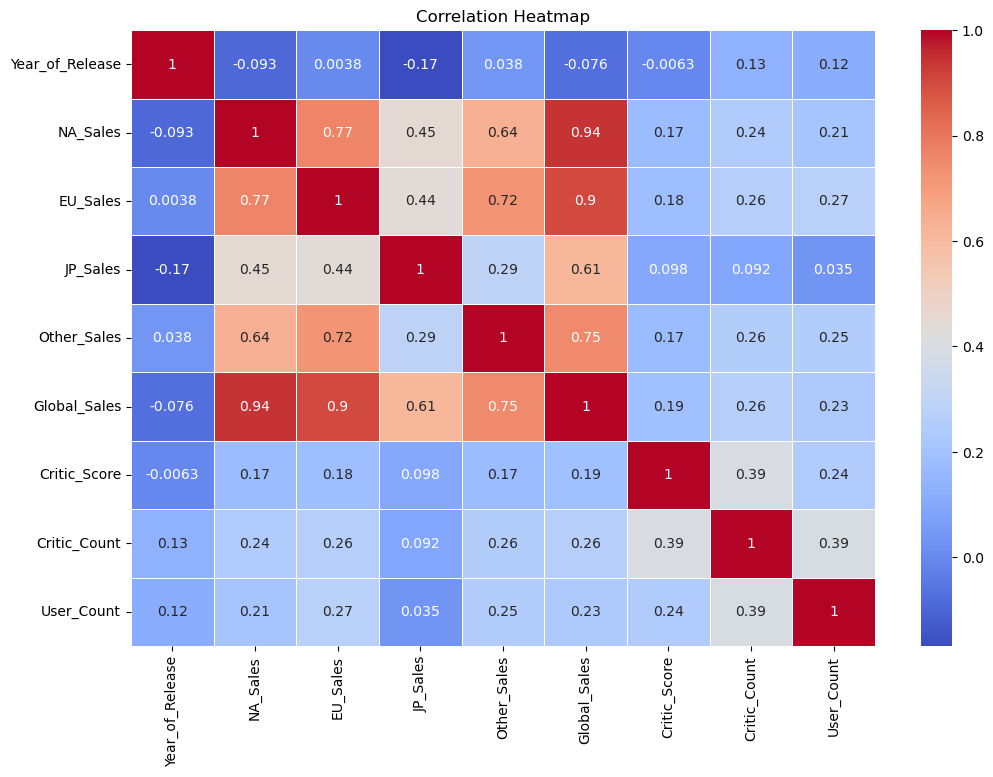

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


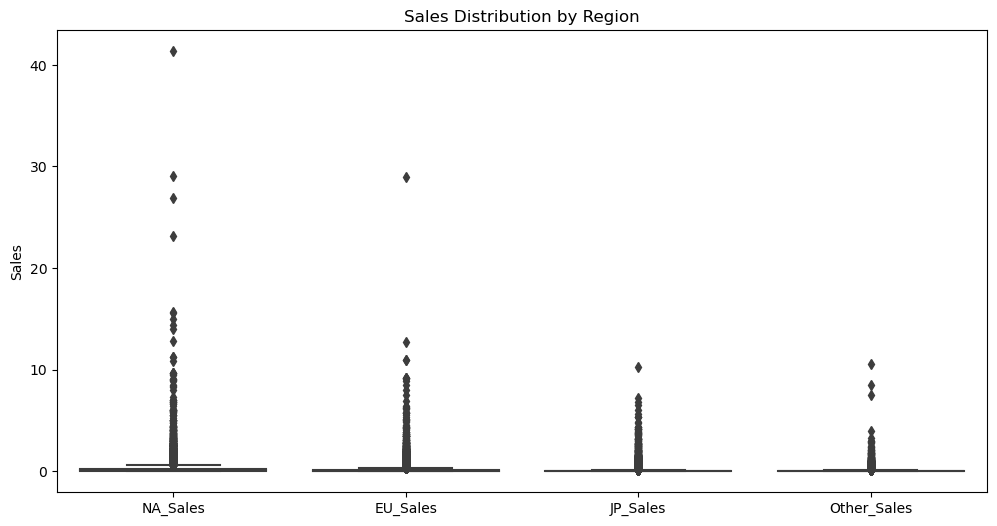

In [15]:
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[region_cols])
plt.title('Sales Distribution by Region')
plt.ylabel('Sales')
plt.show()


This displays the sales distribution for Games' Sales in each region. we can see that NA has highest sales and mostly the games are making 0-20 million sales and some of them are over 20 million which is interesting.

In [11]:
categorical_columns = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
df[categorical_columns] = df[categorical_columns].astype('category')


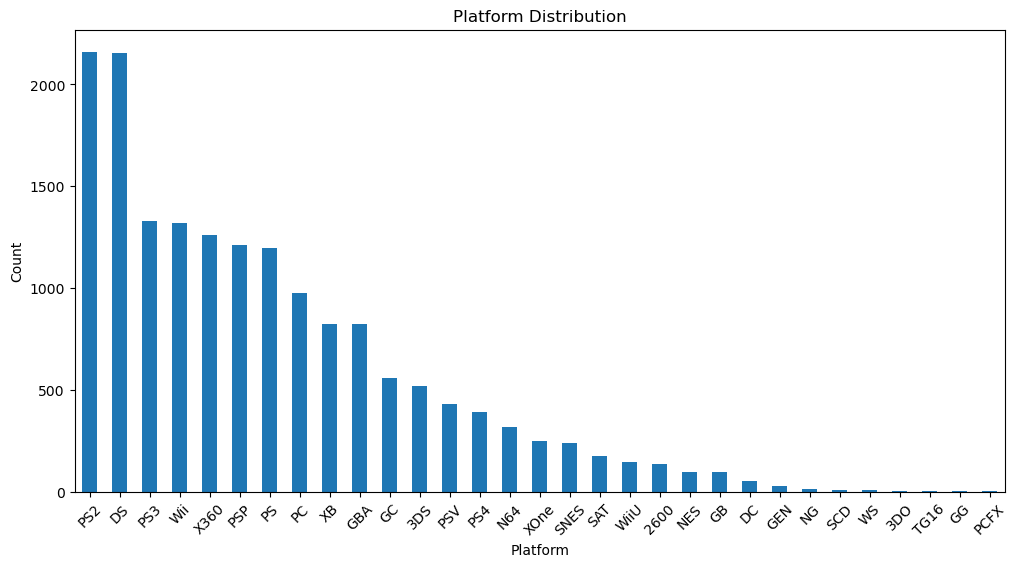

In [60]:
plt.figure(figsize=(12, 6))
df['Platform'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This visual shows the platform distribution of Games. We can see that PS2 And DS has the highest no. of games made for. 

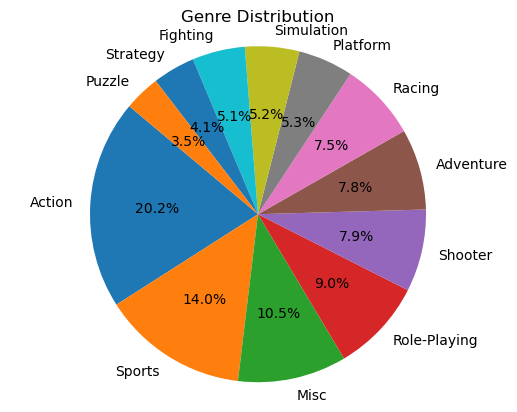

In [14]:
genre_counts = df['Genre'].value_counts()

# Create a pie chart for genre distribution
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

this visual shows the distribution of Game Genres. we can see that most of the games made belonged to Action genre followed by sports and so on.

### seperating categorical and numerical columns

In [11]:
# Creating Categorical DataFrame
categorical_df = df.select_dtypes('O')

categorical_df.head()

,Name,Platform,Genre,Publisher,User_Score
0,Wii Sports,Wii,Sports,Nintendo,8
1,Super Mario Bros.,NES,Platform,Nintendo,NaN
2,Mario Kart Wii,Wii,Racing,Nintendo,8.3
3,Wii Sports Resort,Wii,Sports,Nintendo,8
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,NaN


In [12]:

numerical_df = df.select_dtypes(('int', 'float'))

numerical_df.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0
1,1985.0,29.08,3.58,6.81,0.77,40.24,71.0,21.0,24.0
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0
4,1996.0,11.27,8.89,10.22,1.00,31.37,71.0,21.0,24.0


In [33]:
categorical_features = categorical_df.columns
print(categorical_features)


numerical_features = numerical_df.columns
print(numerical_features)

Index(['Name', 'Platform', 'Genre', 'Publisher', 'User_Score'], dtype='object')
Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count'],
      dtype='object')


C:\Users\vedant\AppData\Local\Temp\ipykernel_24904\4258074802.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = df.corr()


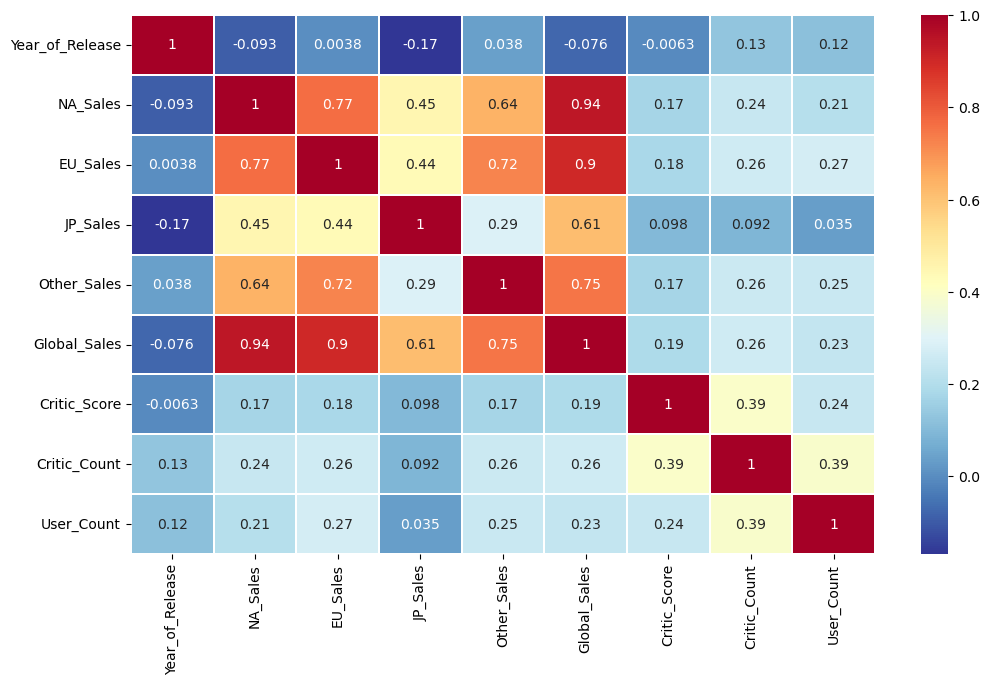

In [25]:
corr_ = df.corr()

plt.figure(figsize=(12, 7))

sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')

plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
data = df.copy()

le = LabelEncoder()

In [50]:
# encoding for further analysis as it should be numerical
feature = ["Platform", "Genre","Year_of_Release"]


for col in feature:
    data[col] = le.fit_transform(df[col])
    
    

In [51]:
X = data[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Year_of_Release']].values

y = data['Global_Sales'].values

In [52]:
X[:5], y[:5]

(array([[26.  , 10.  , 41.36, 28.96,  3.77,  8.45, 26.  ],
        [11.  ,  4.  , 29.08,  3.58,  6.81,  0.77,  5.  ],
        [26.  ,  6.  , 15.68, 12.76,  3.79,  3.29, 28.  ],
        [26.  , 10.  , 15.61, 10.93,  3.28,  2.95, 29.  ],
        [ 5.  ,  7.  , 11.27,  8.89, 10.22,  1.  , 16.  ]]),
 array([82.53, 40.24, 35.52, 32.77, 31.37]))

### train test splitting

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

In [55]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13375, 7), (13375,), (3344, 7), (3344,))

### implementing different models for evaluation

#### Linear regression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and fit the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
pred = lr.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 0.002960224580142363
Mean Squared Error: 2.7577763396092746e-05
Root Mean Squared Error: 0.005251453455577108
R-squared: 0.9999931341794294


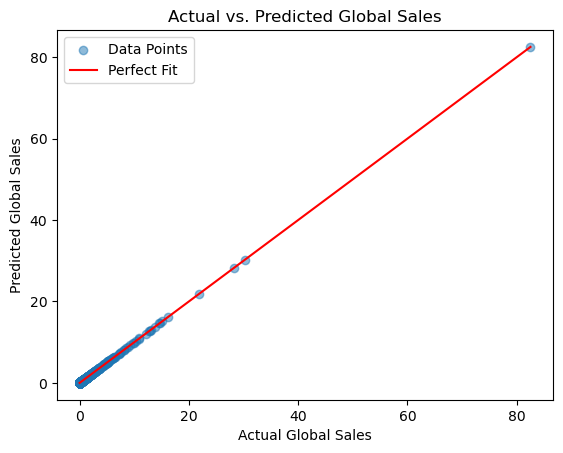

In [57]:


# Visualize actual vs. predicted values
plt.scatter(y_test, pred, alpha=0.5, label='Data Points')
plt.plot(np.linspace(0, max(y_test), 100), np.linspace(0, max(y_test), 100), color='red', label='Perfect Fit')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs. Predicted Global Sales')
plt.legend()
plt.show()


#### decision tree regressor

Mean Absolute Error: 0.06189443779904307
Mean Squared Error: 0.6568625868055556
Root Mean Squared Error: 0.8104705958920136
R-squared: 0.8364660470906116


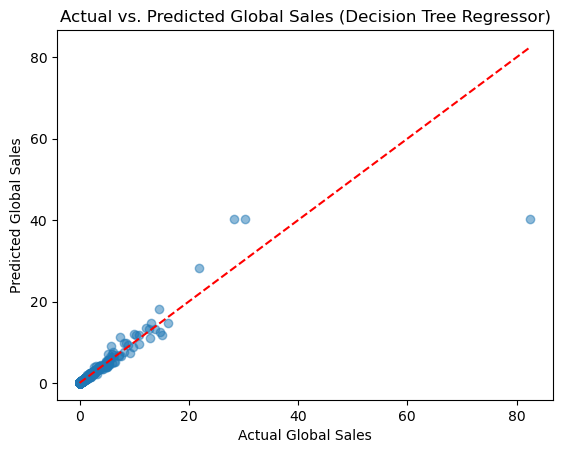

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create and fit the Decision Tree Regressor model
dtr = DecisionTreeRegressor(random_state=32)
dtr.fit(X_train, y_train)

pred = dtr.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Visualize actual vs. predicted values
plt.scatter(y_test, pred, alpha=0.5)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs. Predicted Global Sales (Decision Tree Regressor)')
plt.show()


#### Random forest regressor

Mean Absolute Error: 0.03434959856132704
Mean Squared Error: 0.6829712494826119
Root Mean Squared Error: 0.8264207460383675
R-squared: 0.8299659770629959


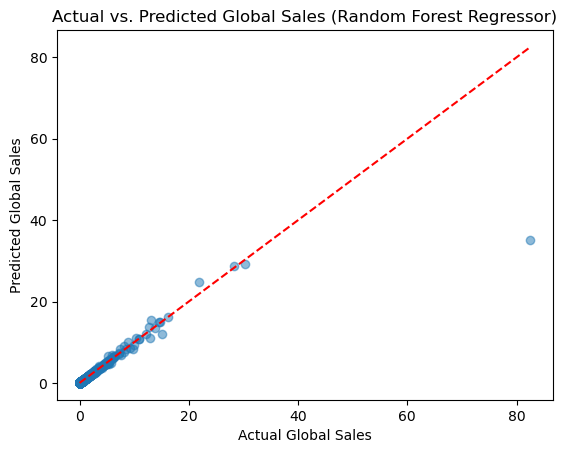

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Create and fit the Random Forest Regressor model
rfr = RandomForestRegressor(random_state=10)
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Visualize actual vs. predicted values with line of best fit
plt.scatter(y_test, pred, alpha=0.5)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs. Predicted Global Sales (Random Forest Regressor)')
plt.show()


## Conclusion:
#### Out of all the models linear regression gives the most accuracy which states that it will be the best fit for the dataset to predict the sales figures